<a href="https://colab.research.google.com/github/mchandekar/deploying-machine-learning-models/blob/master/Group6_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applied Machine Learning Assignment**

**Submitted To:**
*   Prof. Anita Ramachandran
*   Prof. Divya Mohan



**Assignment Dataset:** CreditCard

**Group Number:** 06

**Group Members:**
*   Manish Chandekar
*   Dheeraj Borse
*   Gitimaya Choudhury
*   Deepanshi Dubey





# **Import Libraries/ Dataset**

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function 
from sklearn.model_selection import train_test_split

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#Import the warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Import the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Import the classification_report from metrics
from sklearn.metrics import classification_report

**Import Credit Card Dataset**

In [ ]:
credit_data = pd.read_csv('creditcard.csv')

# **1.1 Printing 2 rows from the dataset**

In [ ]:
credit_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


**Credit Card Dataset Observations**

Dataset contains below features:
*   28 columns V1-V28
*   Time
*   Amount
*   Class

Total Number of Rows: 2,84,807

Total Number of Columns: 31




In [ ]:
print(f'Shape of Credit Card Data Set is {credit_data.shape}')

Shape of Credit Card Data Set is (284807, 31)


# **1.2 Determine Class Imbalance**

Finding Class Imbalance using Count Plot

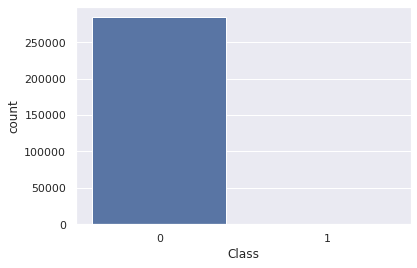

In [ ]:
sns.countplot(x="Class", data=credit_data)

Finding Class Imbalance using Valid and Fraud Credit Card Transactions

In [ ]:
fraud_data = credit_data.loc[credit_data['Class'] == 1] # Fraudulent Rows
valid_data = credit_data.loc[credit_data['Class'] == 0] # Valid Rows

print('Number of Fraud Credit Card Transactions are:', len(fraud_data), ' or ', round(credit_data['Class'].value_counts()[1]/len(credit_data)*100, 2), '% of the dataset')
print('Number of Valid Credit Card Transactions are:', len(valid_data), ' or ', round(credit_data['Class'].value_counts()[0]/len(credit_data)*100, 2), '% of the dataset')

Number of Fraud Credit Card Transactions are: 492  or  0.17 % of the dataset
Number of Valid Credit Card Transactions are: 284315  or  99.83 % of the dataset


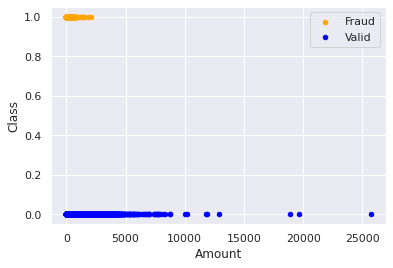

In [ ]:
ax = fraud_data.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
valid_data.plot.scatter(x='Amount', y='Class', color='Blue', label='Valid', ax=ax)
plt.show()

**Observations:** Credit Card Dataset is highly imbalanced with 99.83% data as valid whereas a small 0.17% data is fraud/invalid

# **1.3 Data Visualization**

Data Visualization: Using Credit Card Dataset Describe

In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Dataset Visualization: Using Histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e09b4d290>,
      dtype=object)

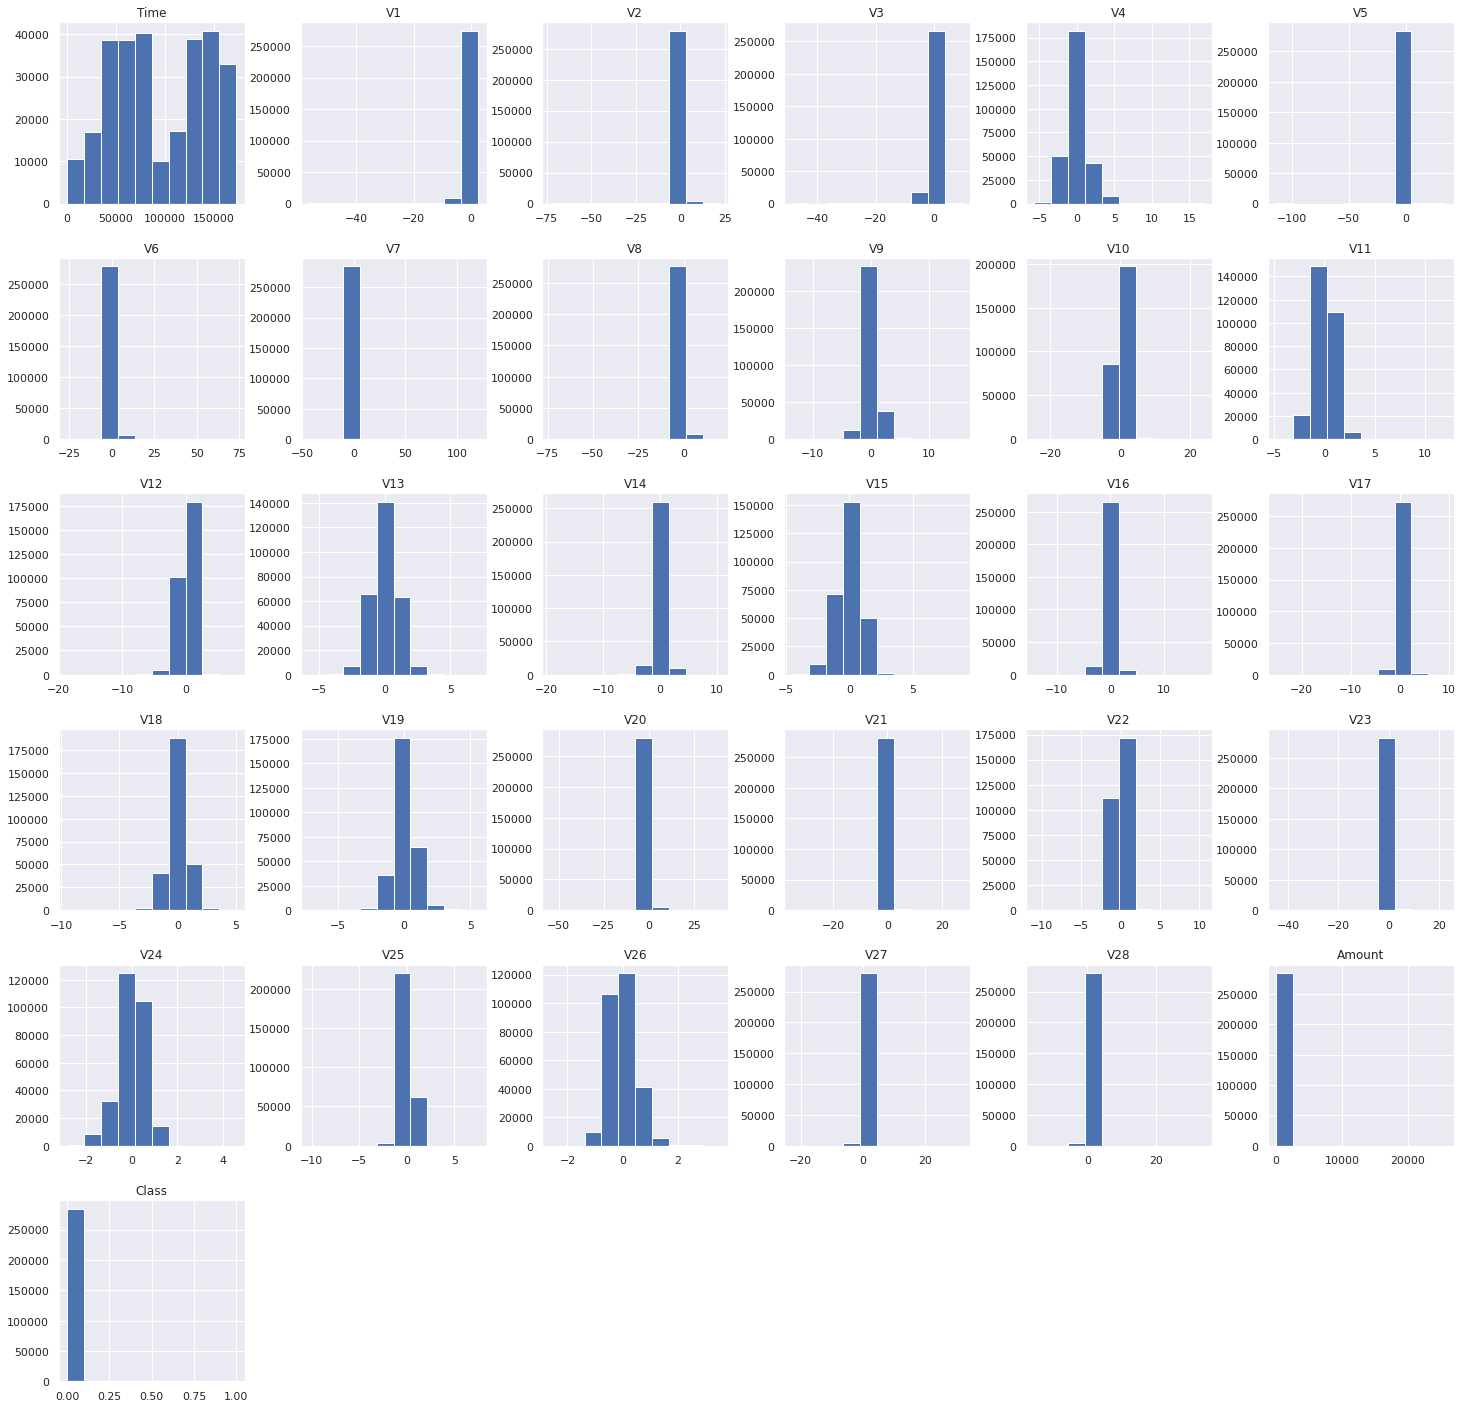

In [ ]:
credit_data.hist(figsize=(25,25))

# **1.4 Correlational Analysis on the Credit Card Dataset**

In [ ]:
cor = credit_data.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Correlational HeatMap

Text(0.5, 1.0, 'Heatmap of Credit Card Correlation')

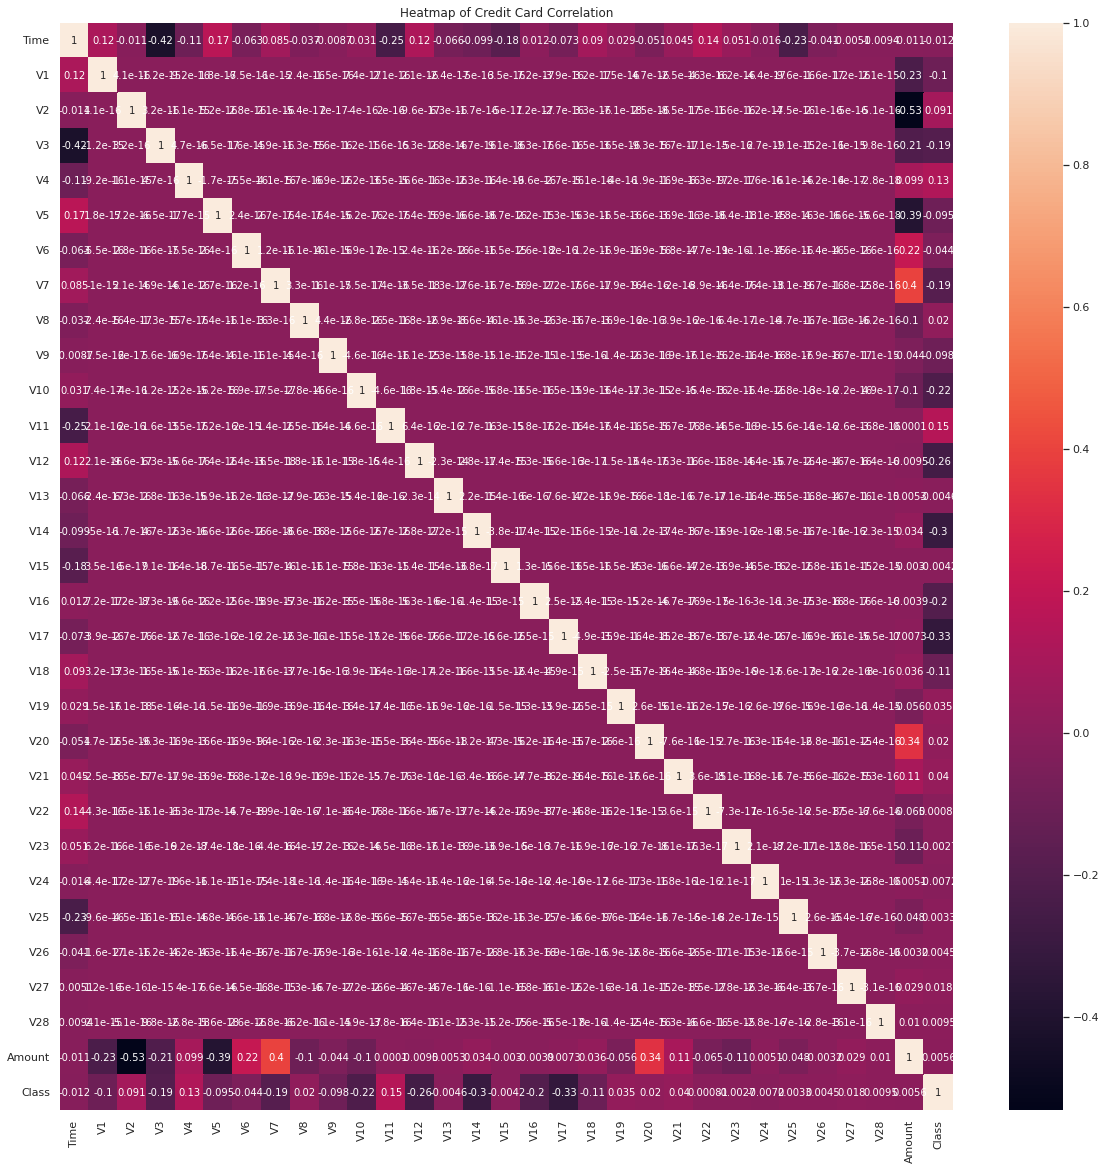

In [ ]:
plt.figure(figsize=(20,20))
heat = sns.heatmap(data=cor,annot=True)
plt.title('Heatmap of Credit Card Correlation')

In [ ]:
print(cor['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


**Observations:** Using the HeatMap correlational analysis, below observations can be made:

**High Correlation between:**
*   Amount and V7
*   Amount and V20
*   Class and V11
*   Class and V4

**Low Correlation between:**
*   Amount and V2
*   Amount and V5
*   Class and V17
*   Class and V14

**More Likelihood of Fraud Transaction:**
V2, V4, V11, V19 and V21 have high correlation with Class. Higher the value of these features, higher will be the likelihood of a fraud transaction.

**Less Likelihood of Fraud Transaction:**
V10, V12, V14, V16 and V17 have very low correlation with the Class Feature. Hence, lower the value of these features, the more likelihood of a fraud transaction.



# **2 Data Pre-Processing and Cleaning**

# Identify NULL Values

2.1.1 Check the number of NULL and Non-NULL values

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2.1.2 Boolean Check for NULL values

In [ ]:
credit_data.isnull().values.any()

False

2.1.3 Check the number of NULL rows in the dataset

In [ ]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observation:** No Null Values detected in the Credit Card DataSet

# Identify Outliers and Skewed Data

Identifying the skew value for the Amount Feature

In [ ]:
print(credit_data['Amount'].skew())
credit_data['Amount'].describe()

16.977724453761024


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Plotting Histogram for Amount Feature

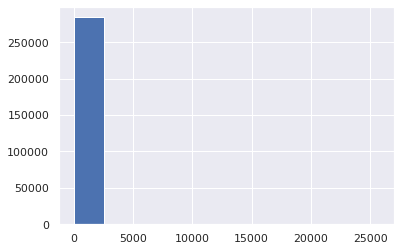

In [ ]:
credit_data['Amount'].hist()

Plotting the Amount Data against the Time

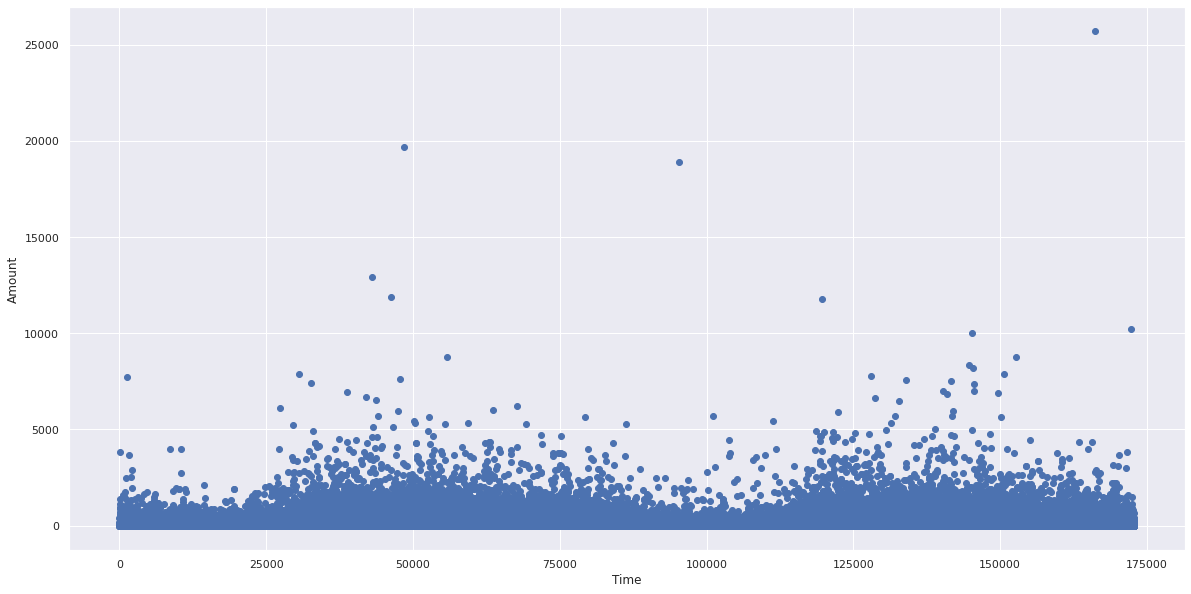

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(credit_data['Time'], credit_data['Amount'])
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
plt.show()

**Observation:** Amount Feature is very much skewed and most of the data is below 1000

# **2.2 Feature Normalization: Log Transformation**

A new column/feature is added "Log Amount" which contains the log transformed value for the Amount Feature. This will normalize the data and bring the skew value more closer to 0.

Also we will remove the Amount Feature from the processed_credit_data and now use the transformed 'Log_Amount' feature

In [ ]:
processed_credit_data = credit_data.copy()
eps = 0.001 # 0 => 0.1
processed_credit_data['Log_Amount'] = np.log(processed_credit_data.pop('Amount')+eps)
processed_credit_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log_Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,2.942089
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,2.023685
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-6.907755
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,1.722945
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,3.091088
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,4.345959
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,10.153902


Skew Value for Log_Amount is more towards 0. 

In [ ]:
processed_credit_data['Log_Amount'].skew()

-0.8344851061344757

Skew value is less than 0 - indicating that the skewness is more towards the right for the Log_Amount data.

**Histogram for Log_Amount**

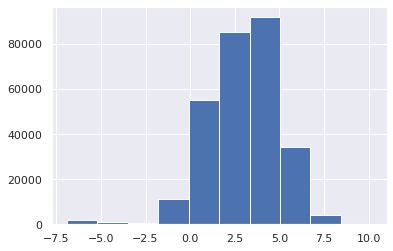

In [ ]:
processed_credit_data['Log_Amount'].hist()

# 3. Model Building

# **3.1 Splitting the Dataset**

The processed_credit_data contains the credit data frame. We need to predict the Class columnn and hence we take that column as y and the rest of the columns as our X variable. 

test_size = 0.2 specifies that 20% of the whole data is taken as our test data and 80% as our train set.

In [ ]:
x = processed_credit_data.drop("Class", axis=1)
y = processed_credit_data["Class"]

Split x and y into training and test set in 80:20 ratio

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=1)
columns = x_train1.columns

Check the shape of x_train1 and x_test1



In [ ]:
x_train1.shape, x_test1.shape

((227845, 30), (56962, 30))

Using MinMaxScaler to transform the independent features of training and test data 

In [ ]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train1)
x_train1 = min_max_scaler.fit_transform(x_train1)
x_test1 = min_max_scaler.transform(x_test1)

**SMOTE:** Managing the imbalance class by oversampling the data set

In [ ]:
ov_sampling = SMOTE(random_state=0)

# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_x, ov_data_y = ov_sampling.fit_resample(x_train1, y_train1)
ov_data_x = pd.DataFrame(data = ov_data_x, columns = columns)
ov_data_y = pd.DataFrame(ov_data_y, columns=['Class'])

print('length of oversampled data is ',len(ov_data_x))
print('Number of no fraud transactions in oversampled data ' ,len(ov_data_y[ov_data_y['Class']==0]))
print('Number of fraud transactions in oversampled data ' ,len(ov_data_y[ov_data_y['Class']==1]))
print('Proportion of no fraud transactions in oversampled data is ' ,len(ov_data_y[ov_data_y['Class']==0])/len(ov_data_x))
print('Proportion of fraud transactions in oversampled data is ' ,len(ov_data_y[ov_data_y['Class']==1])/len(ov_data_x))

length of oversampled data is  454880
Number of no fraud transactions in oversampled data  227440
Number of fraud transactions in oversampled data  227440
Proportion of no fraud transactions in oversampled data is  0.5
Proportion of fraud transactions in oversampled data is  0.5


In [ ]:
ov_data_y['Class'].value_counts()

0    227440
1    227440
Name: Class, dtype: int64

# **3.2 Classifier Modelling**

After creating the over sampled data with equal values for Fraud and Non-Fraud Transactions, we now create instances of the three types of Naive Bayes Algorithm.

**GaussianNB Classification**

To create it, we use the GaussianNB class from sklearn.naive_bayes package to create an instance of the algorithm. Our next step is to fit the algorithm on the training dataset.

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(ov_data_x, ov_data_y.values.ravel())

GaussianNB()

**BernoulliNB Classification**

To create it, we use the BernoulliNB class from sklearn.naive_bayes package to create an instance of the algorithm. Our next step is to fit the algorithm on the training dataset.

In [ ]:
bnb_model = BernoulliNB()
bnb_model.fit(ov_data_x, ov_data_y.values.ravel())

BernoulliNB()

**MultinomialNB Classification**

To create it, we use the MultinomialNB class from sklearn.naive_bayes package to create an instance of the algorithm. Our next step is to fit the algorithm on the training dataset.

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(ov_data_x, ov_data_y.values.ravel())


MultinomialNB()

# **4. Performance Evaluation**

# **4.1.a Compute Accuracy and Confusion Matrix for each Model**
After fitting the model on the training data, we now make predictions and test the performance of each model.

*   Use the predict method to make predictions on the test data
*   Then calculate the accuracy using the accuracy_score class
*   Using confusion_matrix class the confusion matrix is calculated for each model






**GaussianNB Accuracy and Confusion Matrix**



In [ ]:
gnb_y_pred = gnb_model.predict(x_test1)
gnb_accuracy = metrics.accuracy_score(y_test1, gnb_y_pred)
gnb_model_score = gnb_model.score(x_test1, y_test1)

print('GaussianNB Model score :', gnb_model_score)
print(f'GaussianNB Model accuracy score: {100*gnb_accuracy:0.2f}%')
print()
gnb_cm = confusion_matrix(y_test1, gnb_y_pred)
print('GaussianNB Confusion Matrix')
print(gnb_cm)
print()
print('GaussianNB Classification Report')
print(classification_report(y_test1, gnb_y_pred))
print()

GaussianNB Model score : 0.9749482110880938
GaussianNB Model accuracy score: 97.49%

GaussianNB Confusion Matrix
[[55466  1409]
 [   18    69]]

GaussianNB Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.79      0.09        87

    accuracy                           0.97     56962
   macro avg       0.52      0.88      0.54     56962
weighted avg       1.00      0.97      0.99     56962




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


**BernoulliNB Accuracy and Confusion Matrix**

In [ ]:
bnb_y_pred = bnb_model.predict(x_test1)
bnb_accuracy = metrics.accuracy_score(y_test1, bnb_y_pred)
bnb_model_score = bnb_model.score(x_test1, y_test1)

print('BernoulliNB Model score :', bnb_model_score)
print(f'BernoulliNB Model accuracy score: {100*bnb_accuracy:0.2f}%')
print()
bnb_cm = confusion_matrix(y_test1, bnb_y_pred)
print('BernoulliNB Confusion Matrix')
print(bnb_cm)
print()
print('BernoulliNB Classification Report')
print(classification_report(y_test1, bnb_y_pred))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


BernoulliNB Model score : 0.9923282188125417
BernoulliNB Model accuracy score: 99.23%

BernoulliNB Confusion Matrix
[[56517   358]
 [   79     8]]

BernoulliNB Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56875
           1       0.02      0.09      0.04        87

    accuracy                           0.99     56962
   macro avg       0.51      0.54      0.52     56962
weighted avg       1.00      0.99      0.99     56962




**MultinomialNB Accuracy and Confusion Matrix**

In [ ]:
mnb_y_pred = mnb_model.predict(x_test1)
mnb_accuracy = metrics.accuracy_score(y_test1, mnb_y_pred)
mnb_model_score = mnb_model.score(x_test1, y_test1)

print('MultinomialNB Model score :', mnb_model_score)
print(f'MultinomialNB Model accuracy score: {100*mnb_accuracy:0.2f}%')
print()
mnb_cm = confusion_matrix(y_test1, mnb_y_pred)
print('MultinomialNB Confusion Matrix')
print(mnb_cm)
print()
print('MultinomialNB Classification Report')
print(classification_report(y_test1, mnb_y_pred))
print()

MultinomialNB Model score : 0.9991924440855307
MultinomialNB Model accuracy score: 99.92%

MultinomialNB Confusion Matrix
[[56857    18]
 [   28    59]]

MultinomialNB Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.77      0.68      0.72        87

    accuracy                           1.00     56962
   macro avg       0.88      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
%%shell
jupyter nbconvert --to html ///content/Group6_creditcard_html_final.ipynb

[NbConvertApp] Converting notebook ///content/Group6_creditcard_html_final.ipynb to html
[NbConvertApp] Writing 1002073 bytes to ///content/Group6_creditcard_html_final.html


**4.2 Output.csv**

In [ ]:
output = pd.DataFrame(data={"Actual":y_test1, "Predicted_GaussianNB":gnb_y_pred, "Predicted_BernoulliNB":bnb_y_pred, "Predicted_MultinomialNB":mnb_y_pred})
output.to_csv("output.csv")